In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

Load the data

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Create basic statistical description

- Age: Age of the patient
- Sex: Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp: Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
- trtbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- target: 0= less chance of heart attack 1= more chance of heart attack

In [3]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Obtain technical info

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Check the null values 

In [5]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
heart.duplicated().sum()

np.int64(1)

Delete the duplicated 

In [7]:
heart.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Unique value Analysis

In [13]:
for i in list(heart.columns):
    print("{} -- {}".format(i, heart[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


Categorical Feature Analysis

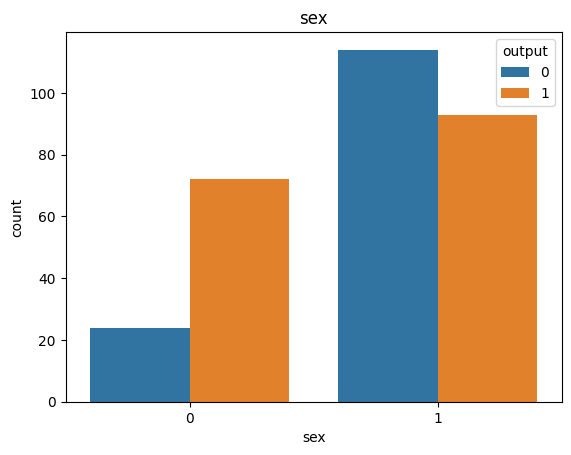

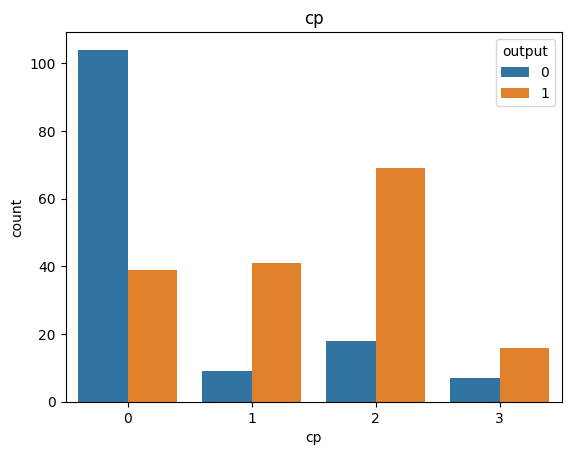

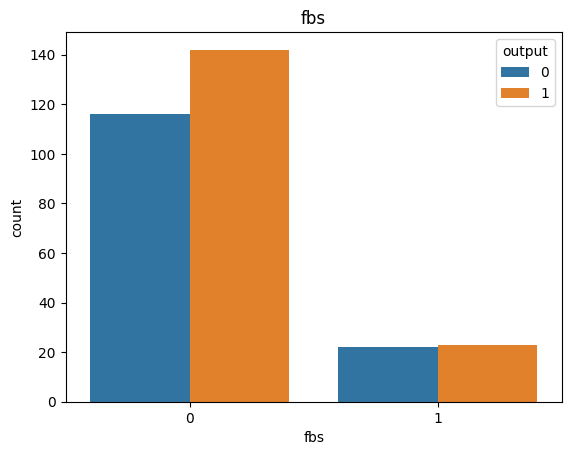

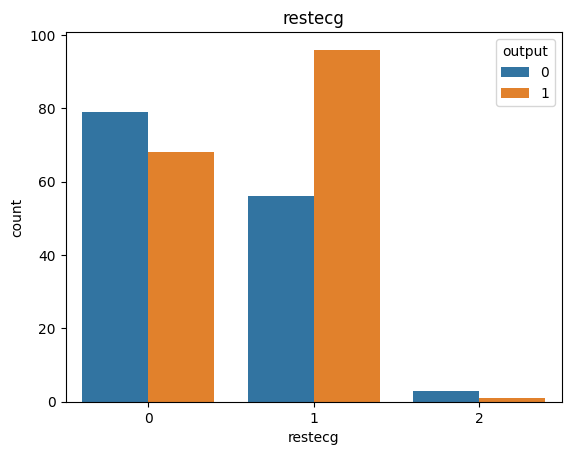

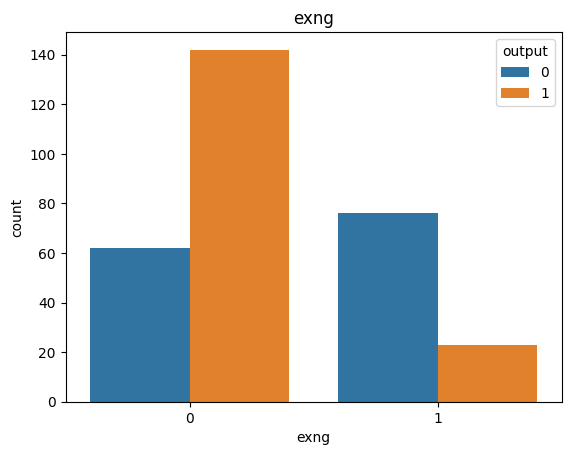

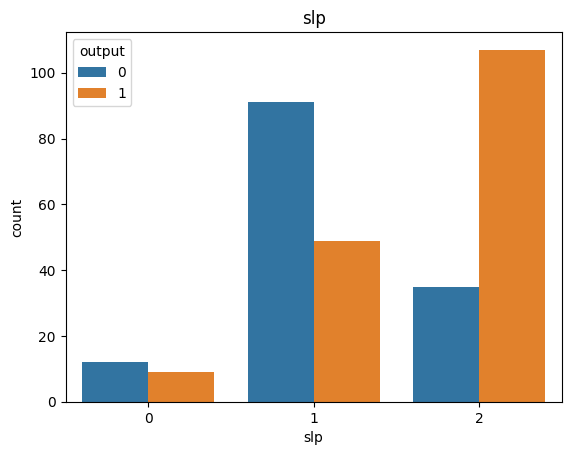

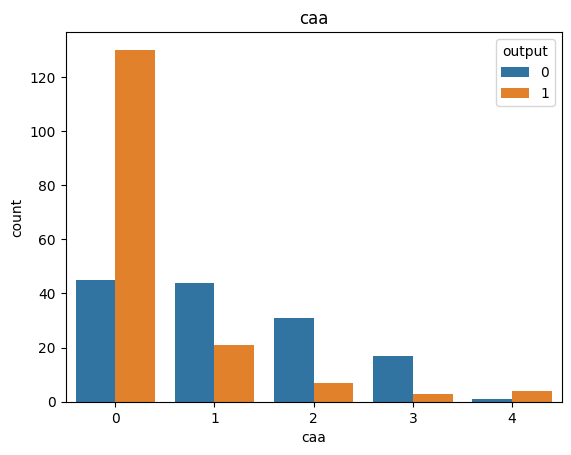

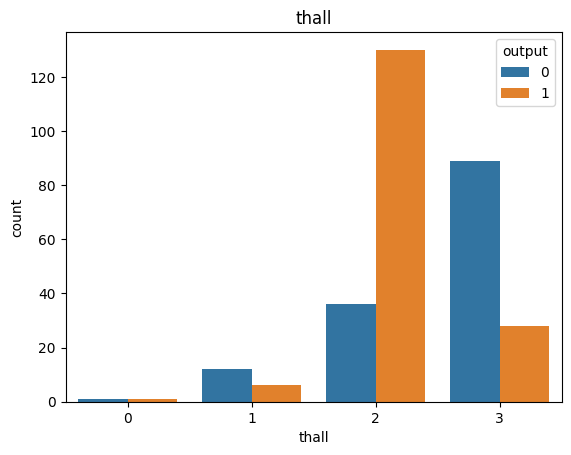

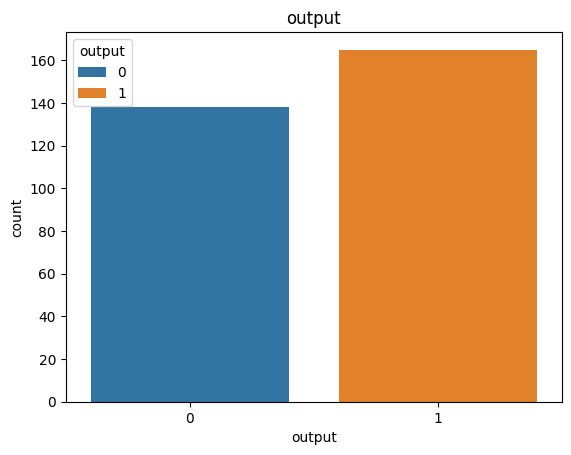

In [15]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

heart_categoric = heart.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = heart_categoric, hue = "output")
    plt.title(i)

Numerical Feature Analysis:
- Bivariate data analysis with scatter plot

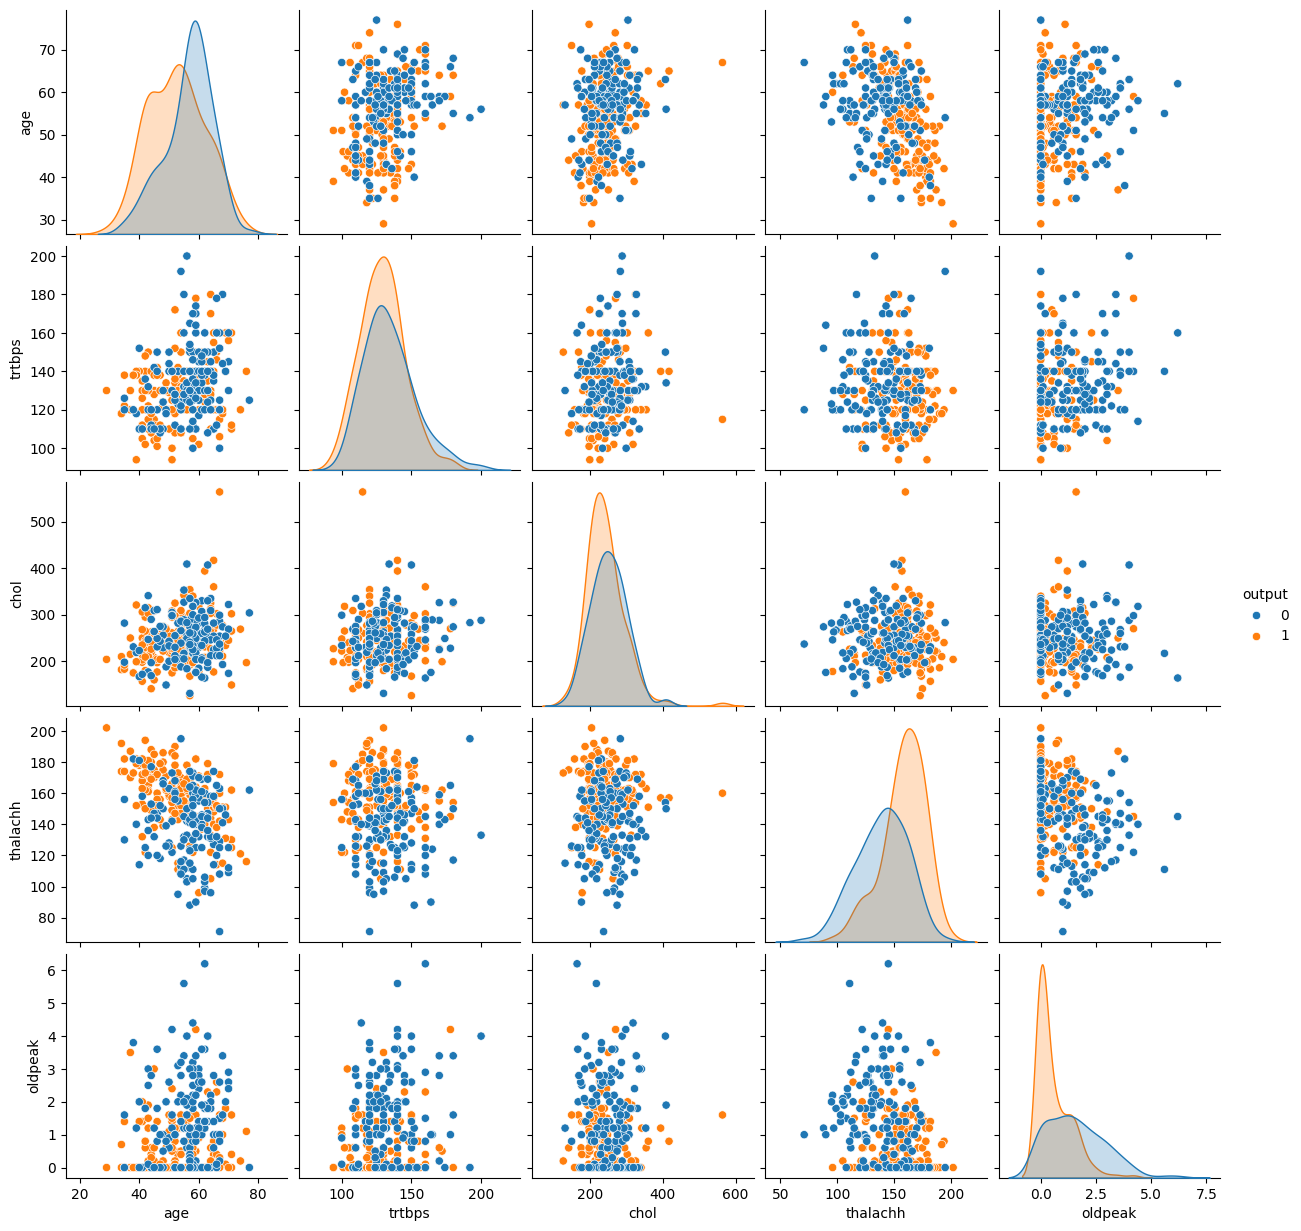

In [16]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

heart_numeric = heart.loc[:, numeric_list]
sns.pairplot(heart_numeric, hue = "output", diag_kind = "kde")
plt.show()

Standarization 

In [28]:
scaler = StandardScaler()
scaler

StandardScaler()

In [30]:
scaled_array = scaler.fit_transform(heart[numeric_list[:-1]])

Box Plot Analysis 

In [31]:
heart_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
heart_dummy.head()

,age,trtbps,chol,thalachh
0,0.965901,0.845093,-0.236684,0.021855
1,-1.902555,-0.061886,0.119326,1.639116
2,-1.461254,-0.061886,-0.843995,0.983470
3,0.193624,-0.666538,-0.173859,1.245729
4,0.303950,-0.666538,2.297269,0.590082


In [32]:
heart_dummy = pd.concat([heart_dummy, heart.loc[:, "output"]], axis = 1)
heart_dummy.head()

,age,trtbps,chol,thalachh,output
0,0.965901,0.845093,-0.236684,0.021855,1.0
1,-1.902555,-0.061886,0.119326,1.639116,1.0
2,-1.461254,-0.061886,-0.843995,0.983470,1.0
3,0.193624,-0.666538,-0.173859,1.245729,1.0
4,0.303950,-0.666538,2.297269,0.590082,1.0


In [33]:
data_melted = pd.melt(heart_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

,output,features,value
0,1.0,age,0.965901
1,1.0,age,-1.902555
2,1.0,age,-1.461254
3,1.0,age,0.193624
4,1.0,age,0.303950
5,1.0,age,0.303950
6,1.0,age,0.193624
7,1.0,age,-1.130278
8,1.0,age,-0.247676
9,1.0,age,0.303950


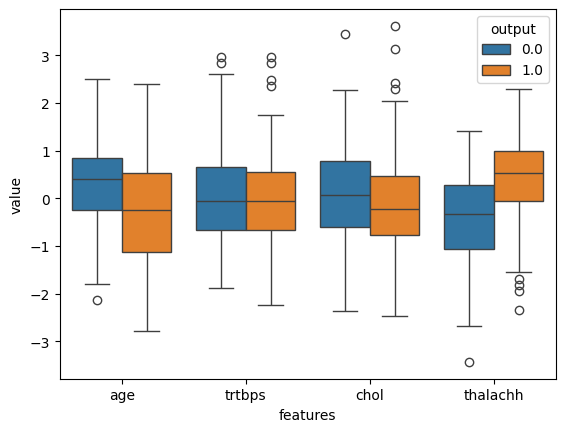

In [34]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

Swarm Plot Analysis

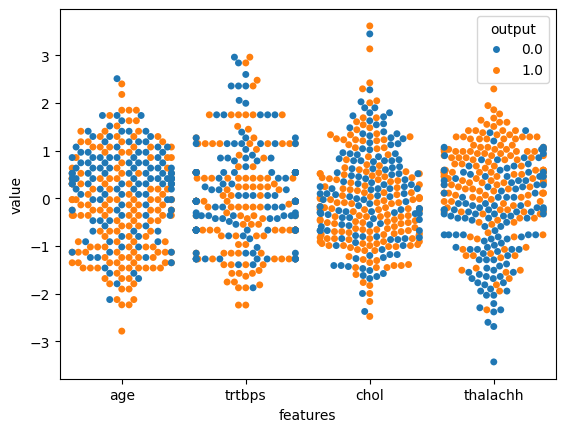

In [35]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

Cat Plot Analysis

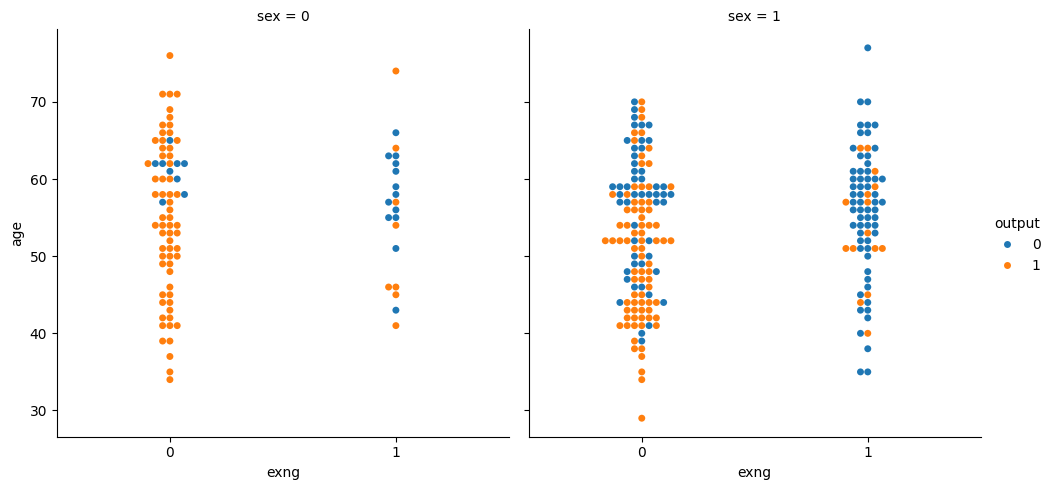

In [37]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = heart)
plt.show()

Correlation Analysis

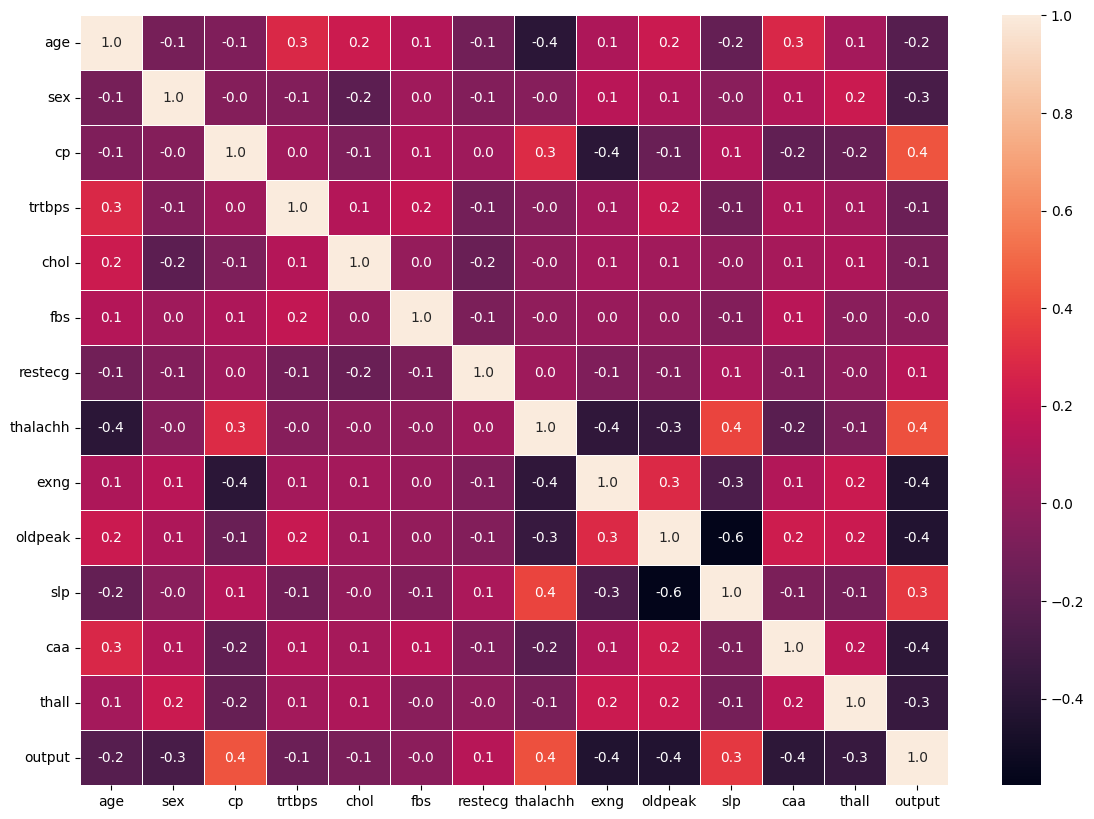

In [18]:
plt.figure(figsize = (14,10))
sns.heatmap(heart.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

Outlier detection

In [19]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = heart.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [22]:
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(heart.loc[:, i],25)
    Q3 = np.percentile(heart.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", heart.loc[:, i].shape)
    
    # upper bound
    upper = np.where(heart.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(heart.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        heart.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        heart.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", heart.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


# Modeling

In [23]:
heart1 = heart.copy()

Encoding Categorical Columns 

In [24]:
heart1 = pd.get_dummies(heart1, columns = categorical_list[:-1], drop_first = True)
heart1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [25]:
X = heart1.drop(["output"], axis = 1)
y = heart1[["output"]]

Scaling

In [38]:
scaler = StandardScaler()
scaler

StandardScaler()

In [39]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.902555,-0.061886,0.119326,1.639116,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.193624,-0.666538,-0.173859,1.245729,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.303950,-0.666538,2.297269,0.590082,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


Train/Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


Logistic Regression

In [41]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [42]:
# fitting = training
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.94268667, 0.05731333],
       [0.06997145, 0.93002855],
       [0.11282989, 0.88717011],
       [0.48063308, 0.51936692],
       [0.08770139, 0.91229861],
       [0.01943155, 0.98056845],
       [0.01314682, 0.98685318],
       [0.25649952, 0.74350048],
       [0.93057819, 0.06942181],
       [0.04667535, 0.95332465],
       [0.95754617, 0.04245383],
       [0.01122815, 0.98877185],
       [0.41901335, 0.58098665],
       [0.60411313, 0.39588687],
       [0.02729659, 0.97270341],
       [0.02614833, 0.97385167],
       [0.84042163, 0.15957837],
       [0.03595037, 0.96404963],
       [0.86160266, 0.13839734],
       [0.97611122, 0.02388878],
       [0.61984028, 0.38015972],
       [0.31186627, 0.68813373],
       [0.93464752, 0.06535248],
       [0.00474577, 0.99525423],
       [0.44456547, 0.55543453],
       [0.3387469 , 0.6612531 ],
       [0.03944728, 0.96055272],
       [0.99154986, 0.00845014],
       [0.46893753, 0.53106247],
       [0.69712671, 0.30287329]])

In [44]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0])

In [45]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


In [46]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

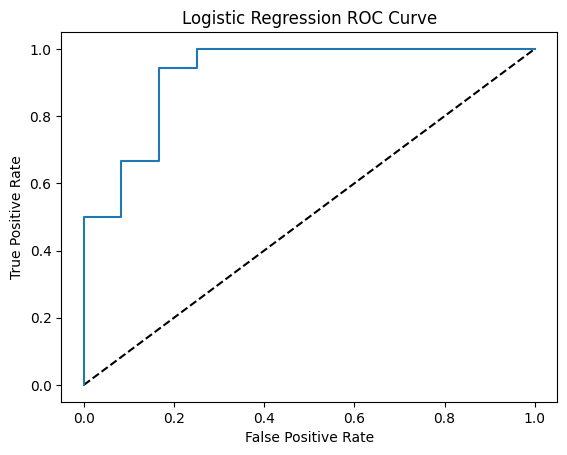

In [47]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

Logistic Regression Hyperparameter Tuning

In [48]:
lr = LogisticRegression()
lr

LogisticRegression()

In [49]:
penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

In [50]:
lr_searcher = GridSearchCV(lr, parameters)

In [51]:
lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [52]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [53]:
y_pred = lr_searcher.predict(X_test)

In [54]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


## PLOTS


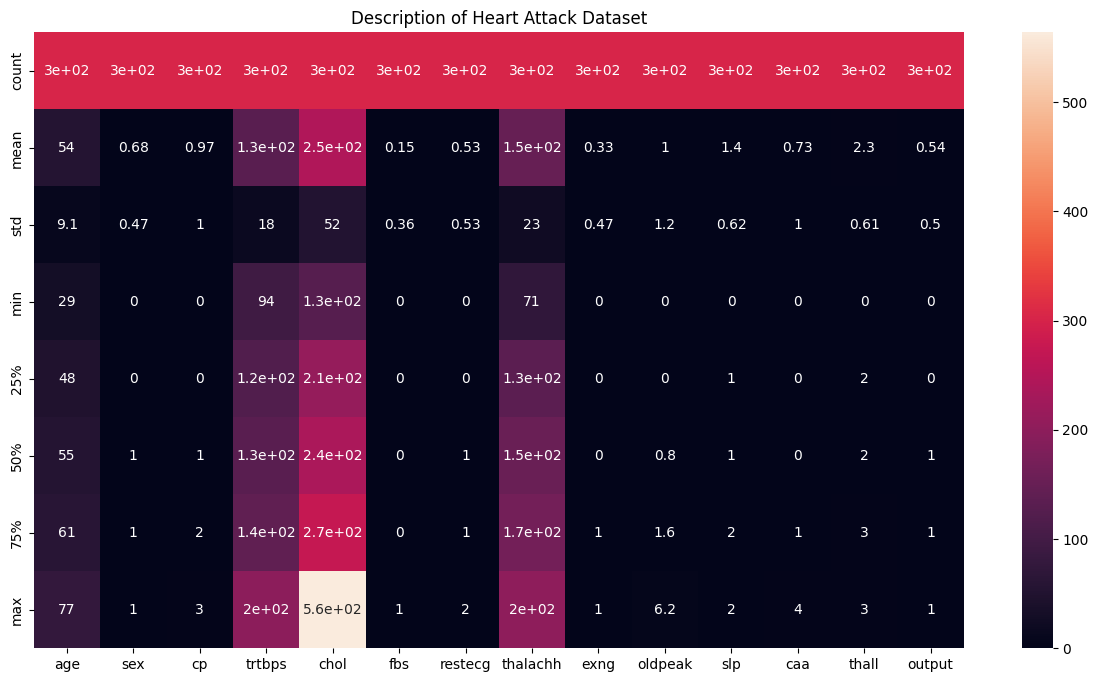

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(heart.describe(), annot=True)  
plt.title('Description of Heart Attack Dataset')
plt.show()

Histograms

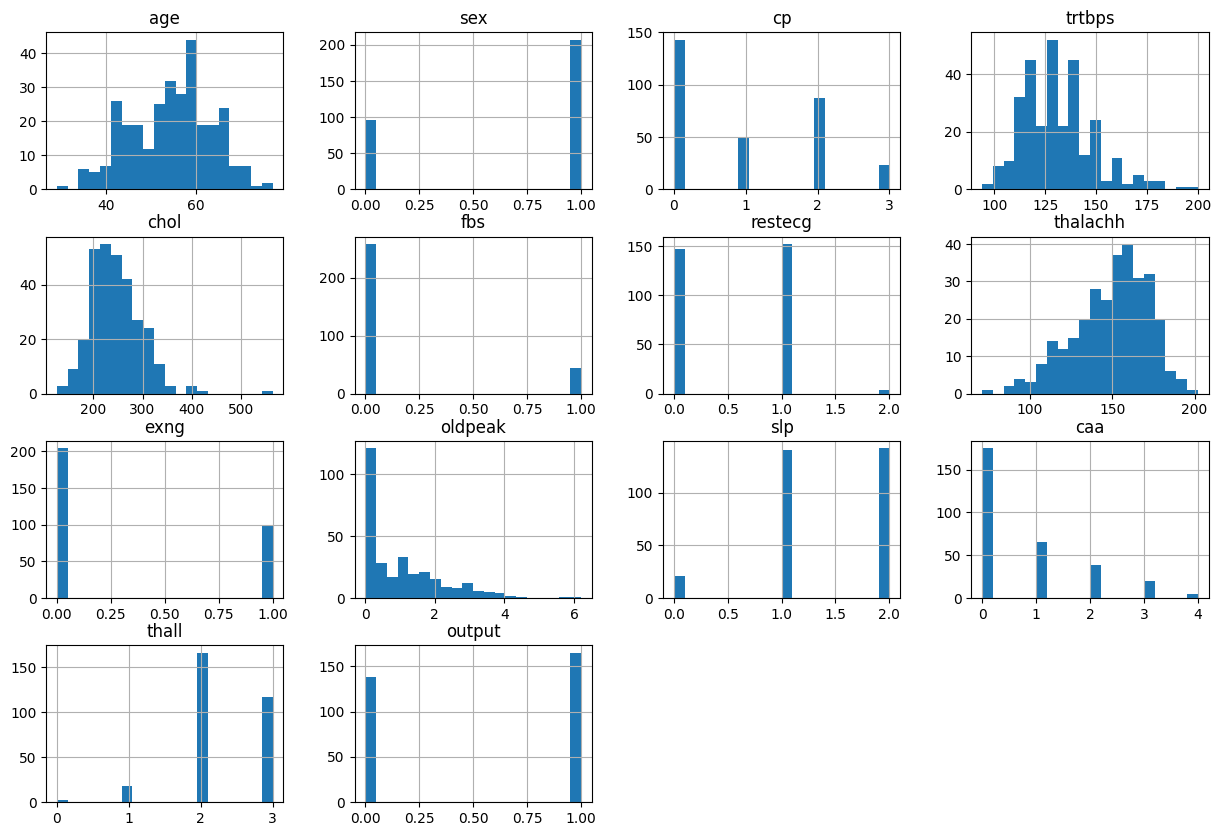

In [9]:
heart.hist(bins= 20, figsize=(15, 10))
plt.show()

In [10]:
columns = heart.columns
columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
rel_age_output = heart.groupby('age')['output'].value_counts().unstack()
rel_age_output

output,0,1
age,,
29,NaN,1.0
34,NaN,2.0
35,2.0,2.0
37,NaN,2.0
38,1.0,2.0
39,1.0,3.0
40,2.0,1.0
41,1.0,9.0
42,1.0,7.0


In [20]:
heart['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7
46     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
38     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [21]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Now for sex

In [22]:
rel_sex_output = heart.groupby('sex')['output'].value_counts().unstack()
rel_sex_output

output,0,1
sex,,
0,24,72
1,114,93


In [23]:
heart['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

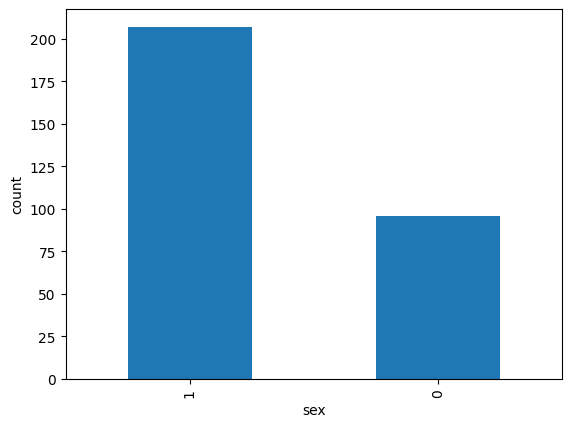

In [24]:
heart['sex'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.show

In [25]:
heart['sex'].describe()

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

Now with CP

https://www.kaggle.com/code/alaaabdelstar/heart-attack
I like this other more:
https://www.kaggle.com/code/kanncaa1/heart-attack-analysis-prediction